<img src='logo2.png'><br>
* ref : https://www.kaggle.com/vikrishnan/boston-house-prices?select=housing.csv

<img src="logo.png">

In [1]:
### 506rows * 14cols DataFrame 생성

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')


from sklearn.linear_model import LogisticRegression ###---(분류 주의주의)
# -------------------------------------------------
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBClassifier
from xgboost import XGBRegressor
# from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  #잔차(실값-예측값) 제곱 합의 평균
from sklearn.metrics import mean_squared_log_error
from scipy.stats import skew, kurtosis  #왜도(skew):좌우치우침    첨도(kurt):중앙값의뾰족함정도

from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV

sns.set()

In [3]:
dataset = load_boston()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
df['target'] = dataset['target']

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.to_csv("toy_boston_houseprice.csv", index=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<pre>
crim	자치시(town)별 1인당 범죄율
zn	25,000 평방 피트를 초과하는 거주지역의 비율
indus	비소매상업지역이 차지하고 있는 토지의 비율
chas	찰스강의 경계에 위치한 경우는 1, 아니면 0
nox	10ppm 당 농축 일산화질소
rm	주택 1가구당 평균 방의 수
age	1940년 이전에 건축한 소유주택 비율
dis	보스톤 직업센터까지의 접근성 지수
rad	방사형 도로까지의 접근성 지수
tax	10,000 달러당 재산세율
ptratio	자치시(town)별 학생/교사 비율
b	자치시(town)별 흑인의 비율
lstat	모집단의 하위 계층의 비율
</pre>

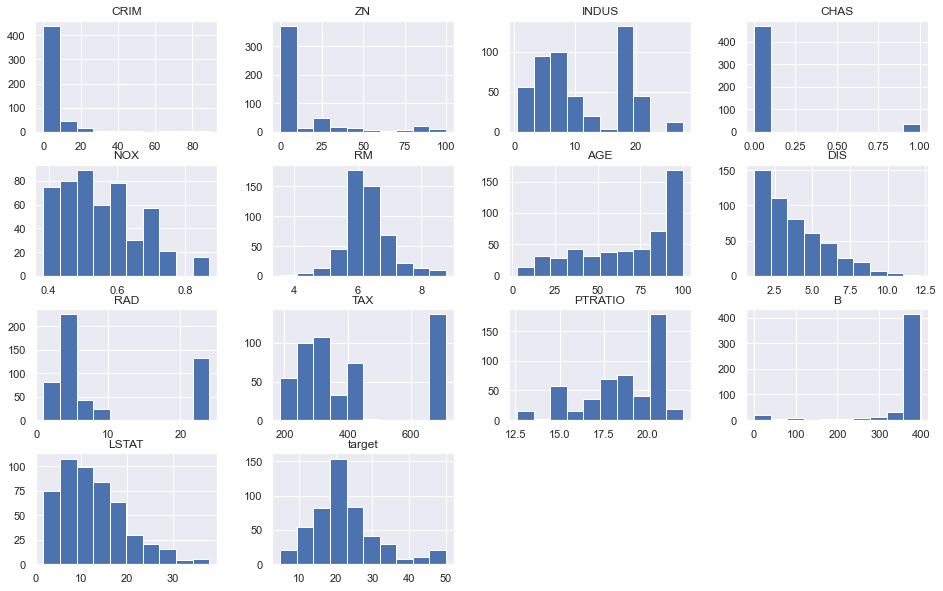

In [9]:
df.hist(figsize=(16,10))
plt.show()

## 데이터 분리

In [10]:
y = df['target']
X = df.drop(['target'], axis=1)

In [11]:
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=1414)

## 1차 점수확인 : 무조건 점수부터 보자(결측x, object X)

In [12]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), DecisionTreeRegressor(),XGBRegressor(), LGBMRegressor()]
for model in models:
    model.fit(X_train,  y_train,)
    pred = model.predict(X_test)
    mse  = mean_squared_error(y_test, pred)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print(f"{model.__class__.__name__}\t MSE:{mse:.4f} RMSE:{rmse:.4f}")
    

LinearRegression	 MSE:30.3504 RMSE:5.5091
Ridge	 MSE:30.6473 RMSE:5.5360
Lasso	 MSE:35.7608 RMSE:5.9800
ElasticNet	 MSE:35.0730 RMSE:5.9222
DecisionTreeRegressor	 MSE:25.5736 RMSE:5.0570
XGBRegressor	 MSE:13.7599 RMSE:3.7094
LGBMRegressor	 MSE:16.2259 RMSE:4.0281


* ref : https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor

In [13]:
model = XGBRegressor(n_estimators=300, random_state=1414, learning_rate=0.1)

### 왜도 첨도 확인

In [14]:
skew_arr  = skew(df)
kurt_arr = kurtosis(df)
print(skew_arr)
print(kurt_arr)
print(df.columns)

[ 5.20765239  2.21906306  0.29414628  3.39579929  0.72714416  0.40241467
 -0.59718559  1.00877876  1.00183349  0.66796827 -0.79994453 -2.88179835
  0.90377074  1.10481082]
[36.75278626  3.97994877 -1.23321847  9.53145284 -0.07586422  1.86102697
 -0.97001393  0.47129857 -0.8705205  -1.14298488 -0.29411638  7.14376929
  0.47654476  1.46862877]
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')


In [26]:
dict = {"skew":skew_arr, "kurt":kurt_arr}
dict_df = pd.DataFrame(dict)  #, index=df.columns)
dict_df = dict_df.set_index(df.columns)
dict_df.head()

,skew,kurt
CRIM,5.207652,36.752786
ZN,2.219063,3.979949
INDUS,0.294146,-1.233218
CHAS,3.395799,9.531453
NOX,0.727144,-0.075864


In [21]:
df_skew = pd.DataFrame([skew_arr, kurt_arr], columns=df.columns, index=['skew','kurt']).T
df_skew.head(20)

,skew,kurt
CRIM,5.207652,36.752786
ZN,2.219063,3.979949
INDUS,0.294146,-1.233218
CHAS,3.395799,9.531453
NOX,0.727144,-0.075864
RM,0.402415,1.861027
AGE,-0.597186,-0.970014
DIS,1.008779,0.471299
RAD,1.001833,-0.870521
TAX,0.667968,-1.142985


<AxesSubplot:>

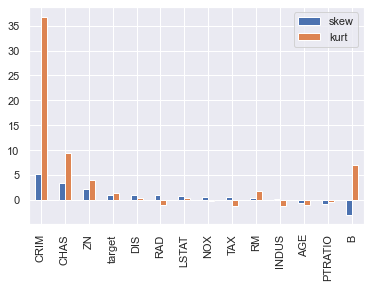

In [25]:
df_skew.sort_values('skew', ascending=False).plot(kind='bar')

<img src='logo3.png' width='900'>

In [16]:
# MinMax Standard Rosubstic 
# skew() : 왜도 확인
# Log변환 : x(-1)없을 경우에만 사용

# 모델
* 랏쏘 : L1규제 -->  x|w|  중요하지 않은 피쳐의 회귀계수를 0으로 만들수 있다.
* 릿지 : L2규제 -->  xw^2  중요하지 않은 피쳐의 회귀계수를 0에 가깝게 만든다.(피쳐가 없어지진 않는다)
* ElasicNet , XGBoostRegressor , LightGBMRegressor, *TreeRegressor
* LogisticRegressor는 분류모델이다 ******

## 평가 매트릭스 
* 잔차제곱합의평균 ( MSE )  -- RMSL RMSLE  MAE LogLoss
*    E    S   M

<pre>
‘neg_mean_absolute_error’      metrics.mean_absolute_error
‘neg_     mean_squared_error’  metrics.mean_squared_error(squared=False)
‘neg_root_mean_squared_error’  metrics.mean_squared_error(squared=True)
‘neg_mean_squared_log_error’   metrics.mean_squared_log_error
---
‘neg_log_loss’                 metrics.log_loss (분류)
</pre>